## Assignment9_LastName_FirstName 
## Due date: Friday, March 26 at 11:59pm

###  Use the following format for homework filename:  

`Assignment9_LastName_FirstName.ipynb`


#### - This assignment is worth 26 points.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.integrate as spqd
%matplotlib inline

**Problem 1**  (2 points) Write a program that uses the bisection method to solve the nonlinear equation $$ x = e^{-x}. $$ Choose your own initial interval.

In [2]:
#Solution for Problem1
def func(x):
    return x*math.exp(x)-1

def bis(a,b,func):
    if (func(a) * func(b) >= 0):
        print("choose new a and b")
        return None
    c = a
    while ((b-a) >= 0.001):
        c = (a+b)/2
        if (func(c) == 0.0):
            break
        if (func(c)*func(a) < 0):
            b = c
        else:
            a = c
    return c

In [3]:
a =-100
b = 100
print(bis(a, b,func))

0.566864013671875


**Problem 2** (2 points)

Write a program that uses the Newton method to find the roots of the following functions on the interval $-2\pi \leq x \leq 2\pi$.

$$f(x) = x \cos(x) − \sin(x) \quad\text{ and }\quad g(x) = (x^3 − x) \sin(x).$$ 

These should be done as two separate calculations.


In [4]:
#Solution for Problem 2
def fn(x):
    return x*np.cos(x)-np.sin(x)

def gn(x):
    return ((x**3)-x)*np.sin(x)

def fp(x):
    return -x*np.sin(x)

def gp(x):
    return (((3*x**2)-1)*np.sin(x))+(x*((x**2)-1)*np.cos(x))

def Newtons(fn,fp,x):
    h = fn(x) / fp(x)
    while abs(h) >= 0.0001:
        h = fn(x)/fp(x)
        x = x - h
    print('F(x):',x)

In [5]:
x0 = -20
Newtons(fn,fp,x0)
Newtons(gn,gp,x0)

F(x): -20.371302959322573
F(x): -18.849555921538784


**Problem 3** (2 points) Compute a root of the function $$f(x) = x^2 - 2$$ 
- using the _secant method_ with initial guess $x_0 = 1.5$ and $x_1=1$.
- Choose a different initial guess and compute another root of the function $f(x)$.

In [6]:
#solution for problem 3
def f(x):
    return (x**2)-2
  
def secant(x1, x2, e, f):
    n = xm = x0 = c = 0
    if (f(x1) * f(x2) < 0):
        while True:
            x0 = ((x1 * f(x2) - x2 * f(x1)) / (f(x2) - f(x1)))
            c = f(x1) * f(x0)
            x1 = x2
            x2 = x0
            n += 1
            if (c == 0):
                break
            xm = ((x1 * f(x2) - x2 * f(x1)) / (f(x2) - f(x1))) 
            if(abs(xm - x0) < e):
                break
        print(x0) 
    else:
        print("No roots in the interval")

In [7]:
x0 = 1.5
x1 = 1
e = 0.0001
secant(x0, x1, e, f)

1.4142011834319526


**Problem 4**: (4 points) - Here is a cubic polynomial with three closely spaced real roots:

$$
p(x) = 580x^4 - 2320x^3 -1160x^2 + 6960x -1740
$$

* What are the exact roots of p?
* Plot $p(x)$ for $-2\leq x \leq 4$.  And plot the location of the four roots on the graph.  
* Starting with $x_{0}=2$, what does Newton's method do?
* Starting with $x_{0}=0.3$ and $x_{1}=0.9$, what does the secant method do?
* Starting with the interval $[0.5,2.9]$, what does bisection do?

roots are: [ 3.73205081 -1.73205081  1.73205081  0.26794919]
there are 4 roots, as this is not a cubic polynomial it has x^4


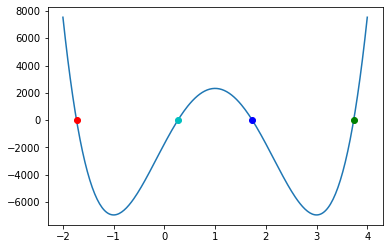

In [8]:
coe = [580, -2320, -1160, 6960, -1740]
print('roots are:',np.roots(coe))
print('there are 4 roots, as this is not a cubic polynomial it has x^4')
xs = np.linspace(-2,4,250)
ys = []
for i in xs:
    ys.append((580*i**4)-(2320*i**3)-(1160*i**2)+(6960*i)-1740)
plt.plot(xs,ys)
plt.plot(3.73205,0,'go') 
plt.plot(-1.73205,0,'ro') 
plt.plot(1.73205,0,'bo') 
plt.plot(.267949,0,'co') 

In [9]:
def pn(x):
    return (580*x**4)-(2320*x**3)-(1160*x**2)+(6960*x)-1740
def pp(x):
    return ((2320*x**3)-(6960*x**2)-2320*x+6960)
Newtons(pn,pp,2)

F(x): 1.7320508075688774


In [10]:
secant(.3, .9, e, pn)

No roots in the interval


In [11]:
print(bis(.5, 2.9, pn))

1.7322265624999997


**Problem 5**: (4 points) In many cases, getting convergence rates via pen and paper is tricky.  However, we can often readily find them via numerical simulation.  

a.)  For 
$$
f(x) = x\cos(x) - \sin^{2}(x), 
$$
find all the roots on the interval $[0,5]$ using Newton's method with a tolerance of $10^{-6}$.


b.)  For each root, establish that the rate of convergence is quadratic.  Note, to do this, you will need to save the various points generated by Newton's method in an array.  You will need to find the fixed point.  Then, you should note that if 
$$
\lim_{n\rightarrow \infty}\frac{|x_{n+1}-x_{\ast}|}{|x_{n}-x_{\ast}|^{\alpha}} = \lambda, 
$$  
then for $n$ large
$$
\ln |x_{n+1}-x_{\ast}| \sim \alpha \ln |x_{n}-x_{\ast}| + \ln \lambda
$$
So, then you should be thinking about the slope of a line in a log/log plot.  

Please provide a well-labeled and well-explained figure describing the rate of convergence for each fixed point.  Does your rate change based on your initial guess?  Again, please elaborate and show plots to make your case.

In [12]:
#solution for Problem 5
def five(x):
    return x*np.cos(x)-(np.sin(x)**2)
def fivep(x):
    return -x*np.sin(x)+np.cos(x)-(2*np.sin(x)*np.cos(x))

In [13]:
Newtons(five,fivep,5)

F(x): 4.909534391393232


**Problem 8** (2 points)

Use the Trapezoid Method to approximate the Fresnel integral in Problem 3 for $x=1$ such that the error is less than $10^{-5}$.

$$f(1) = \int_{0}^{1} \sin(t^2) dt.$$

In [14]:
#Solution for Problem 8
def trap(f, a, b, n):
    h = float(b - a) / n
    s = 0.0
    s += f(a)/2.0
    for i in range(1, n):
        s += f(a + i*h)
    s += f(b)/2.0
    return s * h

print(trap(lambda x:np.sin(x**2), 0, 1, 100))

0.3102773069620939
